# Importing Required Libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sb 
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split #importing train_test_split function

# Loading the Data

In [6]:
data = pd.read_csv('Health_insurance_data.csv')

In [7]:
data

,Area_Service,Hospital County,Hospital Id,Age,Gender,Cultural_group,ethnicity,Days_spend_hsptl,Admission_type,"Home or self care,",...,Mortality risk,Surg_Description,Weight_baby,Abortion,Emergency dept_yes/No,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result,Payment_Typology
0,Western NY,Allegany,37.0,30 to 49,F,White,Not Span/Hispanic,4,Elective,Home or Self Care,...,1,Medical,0,N,Y,5511.95,5582.49,1.012798,1,1
1,Western NY,Allegany,37.0,70 or Older,F,White,Not Span/Hispanic,4,Urgent,Short-term Hospital,...,2,Medical,0,N,Y,4783.20,5162.82,1.079365,1,1
2,Western NY,Allegany,37.0,30 to 49,F,White,Not Span/Hispanic,3,Urgent,Home or Self Care,...,1,Medical,0,N,Y,3829.15,4056.52,1.059379,1,1
3,Western NY,Allegany,37.0,0 to 17,F,White,Not Span/Hispanic,1,Urgent,Home or Self Care,...,1,Medical,0,N,Y,1108.20,1644.75,1.484167,0,1
4,Western NY,Allegany,37.0,70 or Older,F,White,Not Span/Hispanic,3,Elective,Home or Self Care,...,3,Medical,0,N,Y,3418.18,3370.87,0.986161,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,Western NY,Cattaraugus,66.0,50 to 69,M,White,Not Span/Hispanic,1,Emergency,Home or Self Care,...,1,Medical,0,N,Y,2883.48,2921.14,1.013059,1,2
2495,Western NY,Cattaraugus,66.0,18 to 29,M,White,Not Span/Hispanic,2,Emergency,Home or Self Care,...,1,Medical,0,N,Y,6574.38,2157.40,0.328152,1,1
2496,Western NY,Cattaraugus,66.0,18 to 29,F,White,Not Span/Hispanic,3,Elective,Home or Self Care,...,1,Medical,0,N,N,3199.50,1191.08,0.372269,0,1
2497,Western NY,Cattaraugus,66.0,50 to 69,M,White,Not Span/Hispanic,2,Emergency,Home or Self Care,...,3,Medical,0,N,Y,8667.48,5114.17,0.590041,1,1


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Area_Service                           2479 non-null   object 
 1   Hospital County                        2479 non-null   object 
 2   Hospital Id                            2479 non-null   float64
 3   Age                                    2499 non-null   object 
 4   Gender                                 2499 non-null   object 
 5   Cultural_group                         2499 non-null   object 
 6   ethnicity                              2499 non-null   object 
 7   Days_spend_hsptl                       2499 non-null   int64  
 8   Admission_type                         2499 non-null   object 
 9   Home or self care,                     2499 non-null   object 
 10  ccs_diagnosis_code                     2499 non-null   int64  
 11  ccs_

In [9]:
data.describe()

,Hospital Id,Days_spend_hsptl,ccs_diagnosis_code,ccs_procedure_code,Code_illness,Mortality risk,Weight_baby,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result,Payment_Typology
count,2479.000000,2499.000000,2499.000000,2499.000000,2499.000000,2499.000000,2499.000000,2499.000000,2499.000000,2499.000000,2499.000000,2499.000000
mean,43.335619,3.442177,147.653862,66.188876,1.957583,1.745498,414.325730,8929.199368,5467.312629,0.608120,0.769508,1.838335
std,10.071752,3.052542,86.463864,78.496441,0.908880,0.961662,1103.471329,9740.275193,8671.861009,0.363739,0.421232,0.832364
min,37.000000,1.000000,2.000000,0.000000,1.000000,1.000000,0.000000,410.500000,208.450000,0.238430,0.000000,1.000000
25%,39.000000,2.000000,108.000000,0.000000,1.000000,1.000000,0.000000,3678.215000,2068.080000,0.434788,1.000000,1.000000
50%,39.000000,3.000000,149.000000,0.000000,2.000000,1.000000,0.000000,6239.000000,3465.850000,0.480609,1.000000,2.000000
75%,39.000000,4.000000,195.500000,134.000000,3.000000,3.000000,0.000000,10490.985000,5698.175000,0.638315,1.000000,3.000000
max,66.000000,38.000000,663.000000,231.000000,4.000000,4.000000,5100.000000,121028.590000,178056.950000,7.588795,1.000000,3.000000


In [10]:
data.isnull().sum()

Area_Service                             20
Hospital County                          20
Hospital Id                              20
Age                                       0
Gender                                    0
Cultural_group                            0
ethnicity                                 0
Days_spend_hsptl                          0
Admission_type                            0
Home or self care,                        0
ccs_diagnosis_code                        0
ccs_procedure_code                        0
apr_drg_description                       0
Code_illness                              0
Mortality risk                            0
Surg_Description                          0
Weight_baby                               0
Abortion                                  0
Emergency dept_yes/No                     0
Tot_charg                                 0
Tot_cost                                  0
ratio_of_total_costs_to_total_charges     0
Result                          

# Droping Null Values

In [11]:
data1=data.dropna(how='any')

In [12]:
data1.isnull().sum()

Area_Service                             0
Hospital County                          0
Hospital Id                              0
Age                                      0
Gender                                   0
Cultural_group                           0
ethnicity                                0
Days_spend_hsptl                         0
Admission_type                           0
Home or self care,                       0
ccs_diagnosis_code                       0
ccs_procedure_code                       0
apr_drg_description                      0
Code_illness                             0
Mortality risk                           0
Surg_Description                         0
Weight_baby                              0
Abortion                                 0
Emergency dept_yes/No                    0
Tot_charg                                0
Tot_cost                                 0
ratio_of_total_costs_to_total_charges    0
Result                                   0
Payment_Typ

# Droping Duplicate Values

In [13]:
data1.drop_duplicates(keep='first',inplace=True)

C:\Users\DELL\Downloads\Anaconda\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [14]:
data1.duplicated().sum()

0

In [15]:
data1=data.rename(columns={'Hospital County':'hospital_county','Hospital Id':'hospital_id','Home or self care,':'Home_or_self_care','Emergency dept_yes/No':'Emergency_dept_yes/No','Mortality risk':'Mortality_risk'})

In [16]:
data1

,Area_Service,hospital_county,hospital_id,Age,Gender,Cultural_group,ethnicity,Days_spend_hsptl,Admission_type,Home_or_self_care,...,Mortality_risk,Surg_Description,Weight_baby,Abortion,Emergency_dept_yes/No,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result,Payment_Typology
0,Western NY,Allegany,37.0,30 to 49,F,White,Not Span/Hispanic,4,Elective,Home or Self Care,...,1,Medical,0,N,Y,5511.95,5582.49,1.012798,1,1
1,Western NY,Allegany,37.0,70 or Older,F,White,Not Span/Hispanic,4,Urgent,Short-term Hospital,...,2,Medical,0,N,Y,4783.20,5162.82,1.079365,1,1
2,Western NY,Allegany,37.0,30 to 49,F,White,Not Span/Hispanic,3,Urgent,Home or Self Care,...,1,Medical,0,N,Y,3829.15,4056.52,1.059379,1,1
3,Western NY,Allegany,37.0,0 to 17,F,White,Not Span/Hispanic,1,Urgent,Home or Self Care,...,1,Medical,0,N,Y,1108.20,1644.75,1.484167,0,1
4,Western NY,Allegany,37.0,70 or Older,F,White,Not Span/Hispanic,3,Elective,Home or Self Care,...,3,Medical,0,N,Y,3418.18,3370.87,0.986161,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,Western NY,Cattaraugus,66.0,50 to 69,M,White,Not Span/Hispanic,1,Emergency,Home or Self Care,...,1,Medical,0,N,Y,2883.48,2921.14,1.013059,1,2
2495,Western NY,Cattaraugus,66.0,18 to 29,M,White,Not Span/Hispanic,2,Emergency,Home or Self Care,...,1,Medical,0,N,Y,6574.38,2157.40,0.328152,1,1
2496,Western NY,Cattaraugus,66.0,18 to 29,F,White,Not Span/Hispanic,3,Elective,Home or Self Care,...,1,Medical,0,N,N,3199.50,1191.08,0.372269,0,1
2497,Western NY,Cattaraugus,66.0,50 to 69,M,White,Not Span/Hispanic,2,Emergency,Home or Self Care,...,3,Medical,0,N,Y,8667.48,5114.17,0.590041,1,1


# EDA

In [17]:
def MultiLabelEncoder(columnlist,dataframe):
    for i in columnlist:

        labelencoder_X = LabelEncoder()
        dataframe[i] = labelencoder_X.fit_transform(dataframe[i])

In [18]:
columnlist = ['Area_Service','hospital_county','Age','Gender','Days_spend_hsptl','Admission_type','Home_or_self_care','Surg_Description',
              'Emergency_dept_yes/No','Cultural_group','ethnicity','apr_drg_description','Abortion']
MultiLabelEncoder(columnlist,data1)

In [19]:
data1

,Area_Service,hospital_county,hospital_id,Age,Gender,Cultural_group,ethnicity,Days_spend_hsptl,Admission_type,Home_or_self_care,...,Mortality_risk,Surg_Description,Weight_baby,Abortion,Emergency_dept_yes/No,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result,Payment_Typology
0,0,0,37.0,2,0,3,0,3,0,4,...,1,0,0,0,1,5511.95,5582.49,1.012798,1,1
1,0,0,37.0,4,0,3,0,3,4,12,...,2,0,0,0,1,4783.20,5162.82,1.079365,1,1
2,0,0,37.0,2,0,3,0,2,4,4,...,1,0,0,0,1,3829.15,4056.52,1.059379,1,1
3,0,0,37.0,0,0,3,0,0,4,4,...,1,0,0,0,1,1108.20,1644.75,1.484167,0,1
4,0,0,37.0,4,0,3,0,2,0,4,...,3,0,0,0,1,3418.18,3370.87,0.986161,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,0,1,66.0,3,1,3,0,0,1,4,...,1,0,0,0,1,2883.48,2921.14,1.013059,1,2
2495,0,1,66.0,1,1,3,0,1,1,4,...,1,0,0,0,1,6574.38,2157.40,0.328152,1,1
2496,0,1,66.0,1,0,3,0,2,0,4,...,1,0,0,0,0,3199.50,1191.08,0.372269,0,1
2497,0,1,66.0,3,1,3,0,1,1,4,...,3,0,0,0,1,8667.48,5114.17,0.590041,1,1


In [20]:
data1.isnull().sum()

Area_Service                              0
hospital_county                           0
hospital_id                              20
Age                                       0
Gender                                    0
Cultural_group                            0
ethnicity                                 0
Days_spend_hsptl                          0
Admission_type                            0
Home_or_self_care                         0
ccs_diagnosis_code                        0
ccs_procedure_code                        0
apr_drg_description                       0
Code_illness                              0
Mortality_risk                            0
Surg_Description                          0
Weight_baby                               0
Abortion                                  0
Emergency_dept_yes/No                     0
Tot_charg                                 0
Tot_cost                                  0
ratio_of_total_costs_to_total_charges     0
Result                          

In [21]:
df=data1.dropna(how='any')

In [22]:
df.isnull().sum()

Area_Service                             0
hospital_county                          0
hospital_id                              0
Age                                      0
Gender                                   0
Cultural_group                           0
ethnicity                                0
Days_spend_hsptl                         0
Admission_type                           0
Home_or_self_care                        0
ccs_diagnosis_code                       0
ccs_procedure_code                       0
apr_drg_description                      0
Code_illness                             0
Mortality_risk                           0
Surg_Description                         0
Weight_baby                              0
Abortion                                 0
Emergency_dept_yes/No                    0
Tot_charg                                0
Tot_cost                                 0
ratio_of_total_costs_to_total_charges    0
Result                                   0
Payment_Typ

In [23]:
df

,Area_Service,hospital_county,hospital_id,Age,Gender,Cultural_group,ethnicity,Days_spend_hsptl,Admission_type,Home_or_self_care,...,Mortality_risk,Surg_Description,Weight_baby,Abortion,Emergency_dept_yes/No,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result,Payment_Typology
0,0,0,37.0,2,0,3,0,3,0,4,...,1,0,0,0,1,5511.95,5582.49,1.012798,1,1
1,0,0,37.0,4,0,3,0,3,4,12,...,2,0,0,0,1,4783.20,5162.82,1.079365,1,1
2,0,0,37.0,2,0,3,0,2,4,4,...,1,0,0,0,1,3829.15,4056.52,1.059379,1,1
3,0,0,37.0,0,0,3,0,0,4,4,...,1,0,0,0,1,1108.20,1644.75,1.484167,0,1
4,0,0,37.0,4,0,3,0,2,0,4,...,3,0,0,0,1,3418.18,3370.87,0.986161,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,0,1,66.0,3,1,3,0,0,1,4,...,1,0,0,0,1,2883.48,2921.14,1.013059,1,2
2495,0,1,66.0,1,1,3,0,1,1,4,...,1,0,0,0,1,6574.38,2157.40,0.328152,1,1
2496,0,1,66.0,1,0,3,0,2,0,4,...,1,0,0,0,0,3199.50,1191.08,0.372269,0,1
2497,0,1,66.0,3,1,3,0,1,1,4,...,3,0,0,0,1,8667.48,5114.17,0.590041,1,1


<AxesSubplot:xlabel='Result', ylabel='Age'>

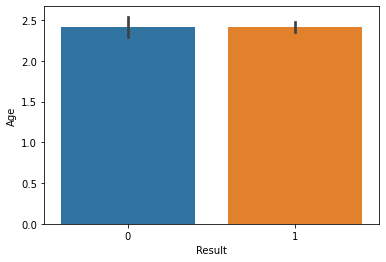

In [24]:
sb.barplot(x="Result",y="Age",data=df)

<AxesSubplot:xlabel='Result', ylabel='Gender'>

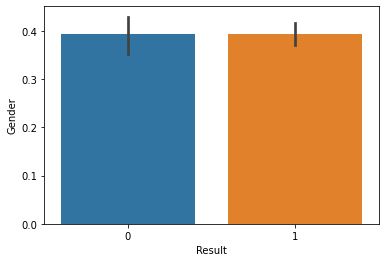

In [25]:
sb.barplot(x="Result",y="Gender",data=df)

<AxesSubplot:xlabel='Result', ylabel='Cultural_group'>

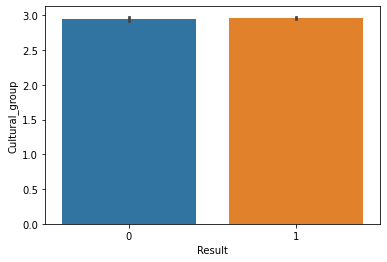

In [26]:
sb.barplot(x="Result",y="Cultural_group",data=df)

<AxesSubplot:xlabel='Result', ylabel='Days_spend_hsptl'>

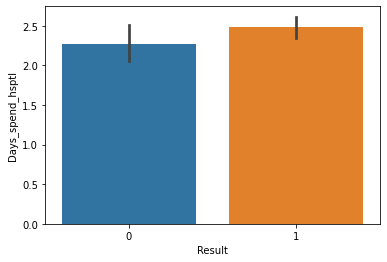

In [27]:
sb.barplot(x="Result",y="Days_spend_hsptl",data=df)

<AxesSubplot:xlabel='Result', ylabel='Home_or_self_care'>

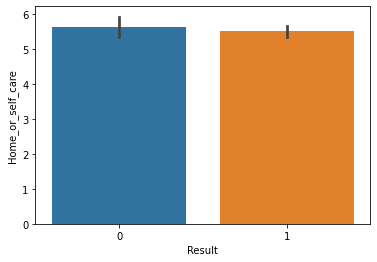

In [28]:
sb.barplot(x='Result',y='Home_or_self_care',data=df)

<AxesSubplot:xlabel='Result', ylabel='ccs_diagnosis_code'>

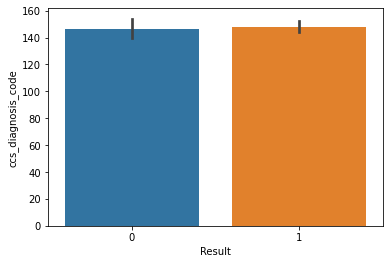

In [29]:
sb.barplot(x='Result',y='ccs_diagnosis_code',data=df)

<AxesSubplot:xlabel='Result', ylabel='ccs_procedure_code'>

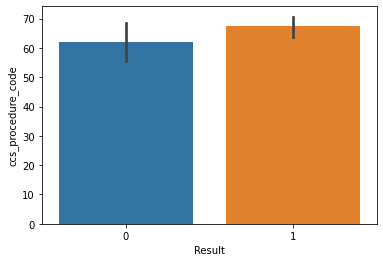

In [30]:
sb.barplot(x='Result',y='ccs_procedure_code',data=df)

<AxesSubplot:xlabel='Result', ylabel='apr_drg_description'>

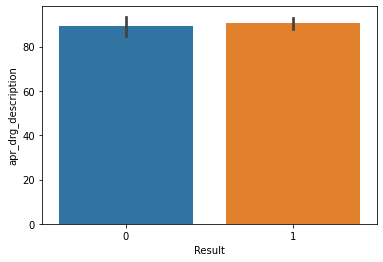

In [31]:
sb.barplot(x='Result',y='apr_drg_description',data=df)

<AxesSubplot:xlabel='Result', ylabel='Code_illness'>

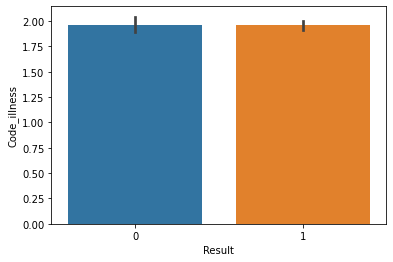

In [32]:
sb.barplot(x='Result',y='Code_illness',data=df)

<AxesSubplot:xlabel='Result', ylabel='Mortality_risk'>

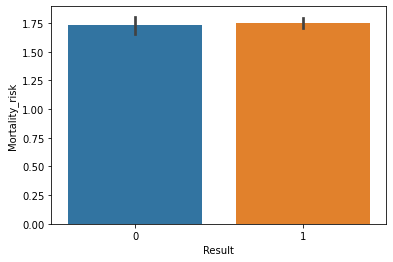

In [33]:
sb.barplot(x='Result',y='Mortality_risk',data=df)

<AxesSubplot:xlabel='Result', ylabel='Surg_Description'>

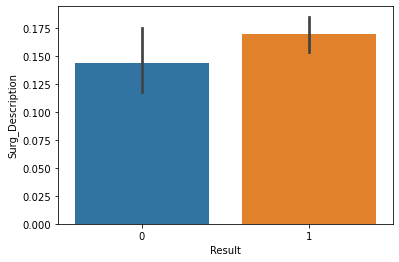

In [34]:
sb.barplot(x='Result',y='Surg_Description',data=df)

<AxesSubplot:xlabel='Result', ylabel='Weight_baby'>

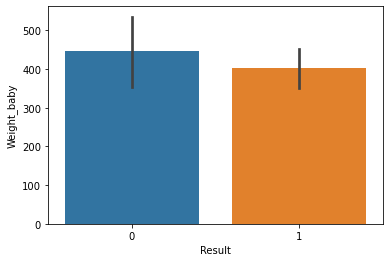

In [35]:
sb.barplot(x='Result',y='Weight_baby',data=df)

<AxesSubplot:xlabel='Result', ylabel='Abortion'>

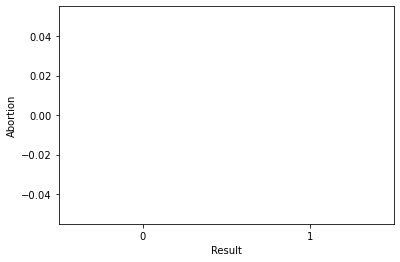

In [36]:
sb.barplot(x='Result',y='Abortion',data=df)

<AxesSubplot:xlabel='Result', ylabel='Emergency_dept_yes/No'>

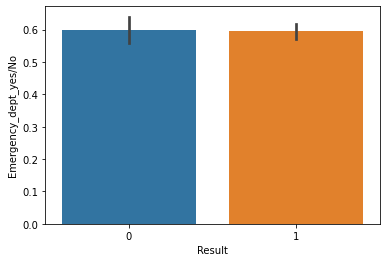

In [37]:
sb.barplot(x='Result',y='Emergency_dept_yes/No',data=df)

<AxesSubplot:xlabel='Result', ylabel='Tot_charg'>

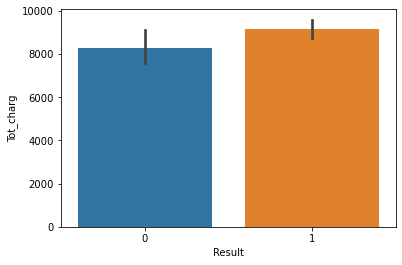

In [38]:
sb.barplot(x='Result',y='Tot_charg',data=df)

<AxesSubplot:xlabel='Result', ylabel='Tot_cost'>

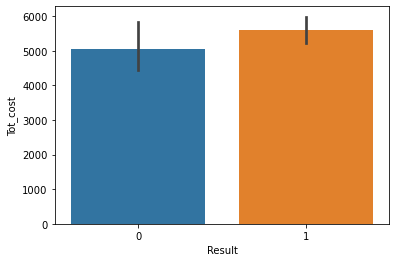

In [39]:
sb.barplot(x='Result',y='Tot_cost',data=df)

<AxesSubplot:xlabel='Result', ylabel='ratio_of_total_costs_to_total_charges'>

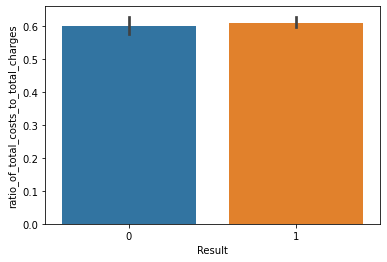

In [40]:
sb.barplot(x='Result',y='ratio_of_total_costs_to_total_charges',data=df)

<AxesSubplot:>

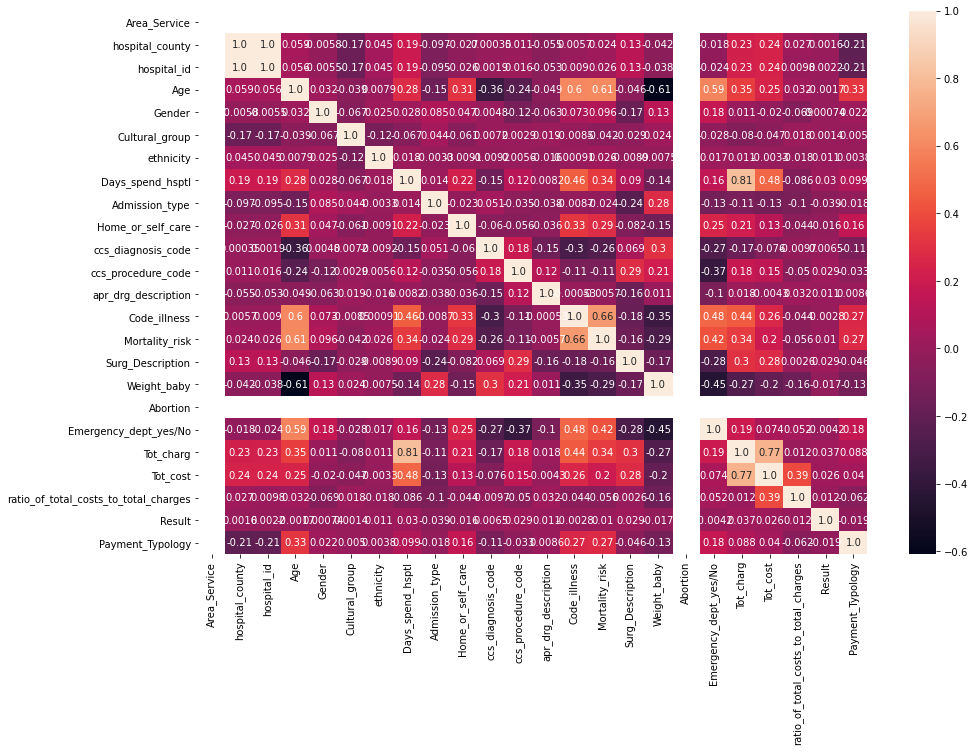

In [41]:
plt.figure(figsize=(15,10))
sb.heatmap(df.corr(),annot=True,fmt='.2')

In [42]:
classifier = SelectKBest(score_func=f_classif,k=5)
fits = classifier.fit(df.drop('Result',axis=1),df['Result'])
x=pd.DataFrame(fits.scores_)
columns = pd.DataFrame(df.drop('Result',axis=1).columns)
fscores = pd.concat([columns,x],axis=1)
fscores.columns = ['Attribute','Score']
fscores.sort_values(by='Score',ascending=False)

C:\Users\DELL\Downloads\Anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 0 17] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\DELL\Downloads\Anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


,Attribute,Score
8,Admission_type,3.841988
19,Tot_charg,3.475205
7,Days_spend_hsptl,2.212503
15,Surg_Description,2.063324
11,ccs_procedure_code,2.039475
20,Tot_cost,1.664677
22,Payment_Typology,0.875343
16,Weight_baby,0.734026
9,Home_or_self_care,0.603813
21,ratio_of_total_costs_to_total_charges,0.332422


Considered Variables with f-score higher than 0.5. I.e., Admission_type, Tot_charg, Days_spend_hsptl,Surg_Description,ccs_procedure_code,Tot_cost,Payment_Typology,Weight_baby,Home_or_self_care.

In [43]:
Feature_cols = {'Admission_type', 'Tot_charg', 'Days_spend_hsptl','Surg_Description','ccs_procedure_code','Tot_cost','Payment_Typology','Weight_baby','Home_or_self_care'}

In [44]:
X = df[Feature_cols]

In [45]:
X

,Tot_cost,Surg_Description,Tot_charg,ccs_procedure_code,Home_or_self_care,Admission_type,Days_spend_hsptl,Weight_baby,Payment_Typology
0,5582.49,0,5511.95,0,4,0,3,0,1
1,5162.82,0,4783.20,0,12,4,3,0,1
2,4056.52,0,3829.15,0,4,4,2,0,1
3,1644.75,0,1108.20,0,4,4,0,0,1
4,3370.87,0,3418.18,0,4,0,2,0,1
...,...,...,...,...,...,...,...,...,...
2494,2921.14,0,2883.48,0,4,1,0,0,2
2495,2157.40,0,6574.38,0,4,1,1,0,1
2496,1191.08,0,3199.50,137,4,0,2,0,1
2497,5114.17,0,8667.48,0,4,1,1,0,1


In [46]:
y = df[['Result']]

In [47]:
y

,Result
0,1
1,1
2,1
3,0
4,1
...,...
2494,1
2495,1
2496,0
2497,1


## Train-testsplit

In [48]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=12)

## Using Decision Tree Model building,Training and testing

In [49]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier(criterion='gini',max_depth=10)
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10)

In [50]:
y_train_predict=dt_model.predict(X_train)

In [51]:
y_test_predict=dt_model.predict(X_test)

## Model Evaluation

In [52]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

### For train data

In [53]:
accuracy_score(y_train,y_train_predict)

0.8628340897629854

In [54]:
confusion_matrix(y_train,y_train_predict)


array([[ 217,  249],
       [  23, 1494]], dtype=int64)

In [55]:
precision_score(y_train,y_train_predict)

0.8571428571428571

### For test data

In [56]:
accuracy_score(y_test,y_test_predict)

0.7096774193548387

In [57]:
confusion_matrix(y_test,y_test_predict)

array([[  7, 102],
       [ 42, 345]], dtype=int64)

In [58]:
precision_score(y_test,y_test_predict)

0.7718120805369127

## Using Random Forest Model building,Training and testing

In [59]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier(n_estimators=100,max_depth=20)
rf_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=20)

In [60]:
y_train_predict=rf_model.predict(X_train)

In [61]:
y_test_predict=rf_model.predict(X_test)

### Model Evaluation

### For Train data

In [62]:
accuracy_score(y_train,y_train_predict)

0.9843671205244579

In [63]:
confusion_matrix(y_test,y_test_predict)

array([[  5, 104],
       [ 22, 365]], dtype=int64)

In [64]:
precision_score(y_train,y_train_predict)

0.9799741602067183

In [81]:
import pickle
pickle.dump(rf_model,open('Fraud_classification.pkl','wb'))

### For test data

In [65]:
accuracy_score(y_test,y_test_predict)

0.7459677419354839

In [66]:
confusion_matrix(y_test,y_test_predict)

array([[  5, 104],
       [ 22, 365]], dtype=int64)

In [67]:
precision_score(y_test,y_test_predict)

0.7782515991471215

## Using Gradient boosting model building,training and testing

In [68]:
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier( n_estimators=100)
gb_model.fit(X_train,y_train)

GradientBoostingClassifier()

In [69]:
y_train_predict=gb_model.predict(X_train)

In [70]:
y_test_predict=gb_model.predict(X_test)

### Model Evaluation

### For train data

In [71]:
accuracy_score(y_train,y_train_predict)

0.7851739788199698

In [72]:
precision_score(y_train,y_train_predict)

0.7810407006697578

In [73]:
confusion_matrix(y_train,y_train_predict)

array([[  41,  425],
       [   1, 1516]], dtype=int64)

### For test data

In [74]:
accuracy_score(y_test,y_test_predict)

0.7701612903225806

In [75]:
precision_score(y_test,y_test_predict)

0.7780040733197556

In [76]:
confusion_matrix(y_test,y_test_predict)

array([[  0, 109],
       [  5, 382]], dtype=int64)

## Using Ada boosting model building,training and testing

In [77]:
from sklearn.ensemble import AdaBoostClassifier
adb_classifier = AdaBoostClassifier()
adb_classifier.fit(X_train,y_train)

AdaBoostClassifier()

In [78]:
y_train_predict=adb_classifier.predict(X_train)

In [79]:
y_test_predict=adb_classifier.predict(X_test)

### Model Evalation

### For train data

In [463]:
accuracy_score(y_train,y_train_predict)

0.7710539586485123

In [464]:
precision_score(y_train,y_train_predict)

0.7699339766378872

In [465]:
confusion_matrix(y_train,y_train_predict)

array([[  13,  453],
       [   1, 1516]], dtype=int64)

### For test data


In [466]:
accuracy_score(y_test,y_test_predict)

0.7741935483870968

In [467]:
precision_score(y_test,y_test_predict)

0.7789046653144016

In [468]:
confusion_matrix(y_test,y_test_predict)

array([[  0, 109],
       [  3, 384]], dtype=int64)

## Using Extreme Gradient Boosting alogorithm model building,training and testing

In [469]:
!pip install xgboost
from  xgboost import XGBClassifier 

In [470]:
xgb_model = XGBClassifier()

In [471]:
xgb_model.fit(X_train,y_train)

[11:48:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [472]:
y_train_predict=xgb_model.predict(X_train)

In [473]:
y_test_predict=xgb_model.predict(X_test)

### Model Evaluation

### For train data

In [474]:
accuracy_score(y_train,y_train_predict)

0.9409984871406959

In [475]:
precision_score(y_train,y_train_predict)

0.9305043050430505

In [476]:
confusion_matrix(y_train,y_train_predict)

array([[ 353,  113],
       [   4, 1513]], dtype=int64)

### For test data

In [477]:
accuracy_score(y_test,y_test_predict)

0.7258064516129032

In [478]:
precision_score(y_test,y_test_predict)

0.779510022271715

In [479]:
confusion_matrix(y_test,y_test_predict)

array([[ 10,  99],
       [ 37, 350]], dtype=int64)

## Using Light Gradient Boosting alogorithm model building,training and testing

In [480]:
!pip install lightgbm
from  lightgbm import LGBMClassifier 

In [481]:
lgb_model=LGBMClassifier()


In [482]:
lgb_model.fit(X_train,y_train)

LGBMClassifier()

In [483]:
y_train_predict=lgb_model.predict(X_train)

In [484]:
y_test_predict=lgb_model.predict(X_test)

### Model Evaluation

### For train data


In [485]:
accuracy_score(y_train,y_train_predict)

0.8673726676752396

In [486]:
precision_score(y_train,y_train_predict)

0.8574686431014823

In [487]:
confusion_matrix(y_train,y_train_predict)

array([[ 216,  250],
       [  13, 1504]], dtype=int64)

### For test data

In [488]:
accuracy_score(y_test,y_test_predict)

0.75

In [489]:
precision_score(y_test,y_test_predict)

0.7803837953091685

In [490]:
confusion_matrix(y_test,y_test_predict)

array([[  6, 103],
       [ 21, 366]], dtype=int64)

## Using KNN  model building,training and testing without NORMALIZATION

In [491]:
from sklearn.neighbors import KNeighborsClassifier

### Generating a Model with K = 3

In [492]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train,y_train)
y_train_pred = knn_model.predict(X_train)
y_test_pred = knn_model.predict(X_test)
print("Train Data Accuracy score: ", round(accuracy_score(y_train,y_train_pred),4))
print("Test Data Accuracy score: ", round(accuracy_score(y_test,y_test_pred),4))


Train Data Accuracy score:  0.8144
Test Data Accuracy score:  0.7218


### Generating a Model with K = 5

In [493]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train,y_train)
y_train_pred = knn_model.predict(X_train)
y_test_pred = knn_model.predict(X_test)
print("Train Data Accuracy score: ", round(accuracy_score(y_train,y_train_pred),4))
print("Test Data Accuracy score: ", round(accuracy_score(y_test,y_test_pred),4))


Train Data Accuracy score:  0.7922
Test Data Accuracy score:  0.7399


### Generating a Model with K = 7

In [494]:
knn_model = KNeighborsClassifier(n_neighbors=7)
knn_model.fit(X_train,y_train)
y_train_pred = knn_model.predict(X_train)
y_test_pred = knn_model.predict(X_test)
print("Train Data Accuracy score: ", round(accuracy_score(y_train,y_train_pred),4))
print("Test Data Accuracy score: ", round(accuracy_score(y_test,y_test_pred),4))


Train Data Accuracy score:  0.7761
Test Data Accuracy score:  0.7379


## Using KNN  model building,training and testing with NORMALIZATION

In [495]:
from sklearn.preprocessing import StandardScaler
scaler   = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [496]:
X_train,X_test,y_train,y_test = train_test_split(scaled_X,y,test_size=0.20,random_state= 12,stratify = y)


### Generating a Model with K = 3

In [497]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train,y_train)
y_train_pred = knn_model.predict(X_train)
y_test_pred = knn_model.predict(X_test)
print("Train Data Accuracy score: ", round(accuracy_score(y_train,y_train_pred),4))
print("Test Data Accuracy score: ", round(accuracy_score(y_test,y_test_pred),4))


Train Data Accuracy score:  0.8195
Test Data Accuracy score:  0.7016


### Generating a Model with K = 5

In [498]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train,y_train)
y_train_pred = knn_model.predict(X_train)
y_test_pred = knn_model.predict(X_test)
print("Train Data Accuracy score: ", round(accuracy_score(y_train,y_train_pred),4))
print("Test Data Accuracy score: ", round(accuracy_score(y_test,y_test_pred),4))


Train Data Accuracy score:  0.7847
Test Data Accuracy score:  0.7238


### Generating a Model with K = 7


In [499]:
knn_model = KNeighborsClassifier(n_neighbors=7)
knn_model.fit(X_train,y_train)
y_train_pred = knn_model.predict(X_train)
y_test_pred = knn_model.predict(X_test)
print("Train Data Accuracy score: ", round(accuracy_score(y_train,y_train_pred),4))
print("Test Data Accuracy score: ", round(accuracy_score(y_test,y_test_pred),4))

Train Data Accuracy score:  0.7771
Test Data Accuracy score:  0.75


## Using SVM  model building,training and testing 


## Kernel=Linear

In [500]:
from sklearn.svm import SVC
svc_classifier = SVC(kernel='linear')
svc_classifier.fit(X_train,y_train)
y_train_pred = svc_classifier.predict(X_train)
y_test_pred = svc_classifier.predict(X_test)

print("Train Data Overall Accuracy : ",round(accuracy_score(y_train,y_train_pred),4))
print("Train data Precision        : ",round(precision_score(y_train,y_train_pred),4))
print("Test Data Overall Accuracy : ",round(accuracy_score(y_test,y_test_pred),4))
print("Test data Precision        : ",round(precision_score(y_test,y_test_pred),4))

Train Data Overall Accuracy :  0.768
Train data Precision        :  0.768
Test Data Overall Accuracy :  0.7681
Test data Precision        :  0.7681


## Kernel=Polynomial

In [501]:
svc_classifier = SVC(kernel='poly',degree = 1)
svc_classifier.fit(X_train,y_train)
y_train_pred = svc_classifier.predict(X_train)
y_test_pred = svc_classifier.predict(X_test)

print("Train Data Overall Accuracy : ",round(accuracy_score(y_train,y_train_pred),4))
print("Train data Precision        : ",round(precision_score(y_train,y_train_pred),4))
print("Test Data Overall Accuracy : ",round(accuracy_score(y_test,y_test_pred),4))
print("Test data Precision        : ",round(precision_score(y_test,y_test_pred),4))


Train Data Overall Accuracy :  0.768
Train data Precision        :  0.768
Test Data Overall Accuracy :  0.7681
Test data Precision        :  0.7681


## Kernel=Rbf

In [502]:
svc_classifier = SVC(kernel='rbf', C=1,gamma = 0.02)
svc_classifier.fit(X_train,y_train)
y_train_pred = svc_classifier.predict(X_train)
y_test_pred = svc_classifier.predict(X_test)

print("Train Data Overall Accuracy : ",round(accuracy_score(y_train,y_train_pred),4))
print("Train data Precision        : ",round(precision_score(y_train,y_train_pred),4))
print("Test Data Overall Accuracy : ",round(accuracy_score(y_test,y_test_pred),4))
print("Test data Precision        : ",round(precision_score(y_test,y_test_pred),4))

Train Data Overall Accuracy :  0.768
Train data Precision        :  0.768
Test Data Overall Accuracy :  0.7681
Test data Precision        :  0.7681


## Model Deployment

### From all the models random forest is the best model as it has best train and test accuracy

In [503]:
from pickle import dump

In [504]:
dump(rf_model,open('rf_model.pkl','wb'))

In [505]:
from pickle import load

In [506]:
tested_rf_model=load(open('rf_model.pkl','rb'))

### Creating our own test data to test the model 

In [517]:
Test_Data=pd.read_csv('Test_data1.csv')

In [518]:
Test_Data

,ccs_procedure_score,Payment_Typology,Days_spend_hsptl,Home_or_self_care,Admission_type,Weight_baby,Total_charg,Total_cost,Surg_Description
0,0,1,1,1,2,500,60000,60000,2
1,1,2,15,2,3,3000,20000,1000000,3
2,3,2,50,1,1,1000,2000000,1000000,2
3,1,2,5,1,2,500,1000000,50000,1


In [534]:
predicted=tested_rf_model.predict(Test_Data)
predicted

array([1, 0, 1, 1], dtype=int64)

In [537]:
Test_Data['predicted']='predicted'

In [542]:
Test_Data['predicted']=[1,0,1,1]

In [543]:
Test_Data

,ccs_procedure_score,Payment_Typology,Days_spend_hsptl,Home_or_self_care,Admission_type,Weight_baby,Total_charg,Total_cost,Surg_Description,predicted
0,0,1,1,1,2,500,60000,60000,2,1
1,1,2,15,2,3,3000,20000,1000000,3,0
2,3,2,50,1,1,1000,2000000,1000000,2,1
3,1,2,5,1,2,500,1000000,50000,1,1


In [547]:
Test_Data['predicted'].replace({1:'Genuine',0:'Fake'},inplace=True)

In [548]:
Test_Data

,ccs_procedure_score,Payment_Typology,Days_spend_hsptl,Home_or_self_care,Admission_type,Weight_baby,Total_charg,Total_cost,Surg_Description,predicted
0,0,1,1,1,2,500,60000,60000,2,Genuine
1,1,2,15,2,3,3000,20000,1000000,3,Fake
2,3,2,50,1,1,1000,2000000,1000000,2,Genuine
3,1,2,5,1,2,500,1000000,50000,1,Genuine
